# Análise Exploratória MP2.5

Apresenta-se uma análise exploratória inicial dos dados de concentração horária de MP2.5, na estação de Guarulhos-Pimenta, no período entre 19/08/2023 e 19/08/2024.

## Importando Bibliotecas

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Obtendo os Dados

In [3]:
data = pd.read_csv("../data/mp2.5_guarulhos-pimenta_1_ano.csv", sep=";", skiprows=6,  encoding='latin-1')[1:]

In [4]:
data.columns = ["Data", "Hora", "MediaHoraria"]
data['MediaHoraria'] = data['MediaHoraria'].astype(float)
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')
data['Hora'] = data['Hora'].replace('24:00', '00:00')
data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M').dt.hour

## Análise Geral dos Dados

In [5]:
data.head()

,Data,Hora,MediaHoraria
1,2023-08-19,1,21.0
2,2023-08-19,2,24.0
3,2023-08-19,3,21.0
4,2023-08-19,4,14.0
5,2023-08-19,5,11.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 1 to 8808
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          8808 non-null   datetime64[ns]
 1   Hora          8808 non-null   int64         
 2   MediaHoraria  7651 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 206.6 KB


### Analisando a Dispersão dos Valores NaN

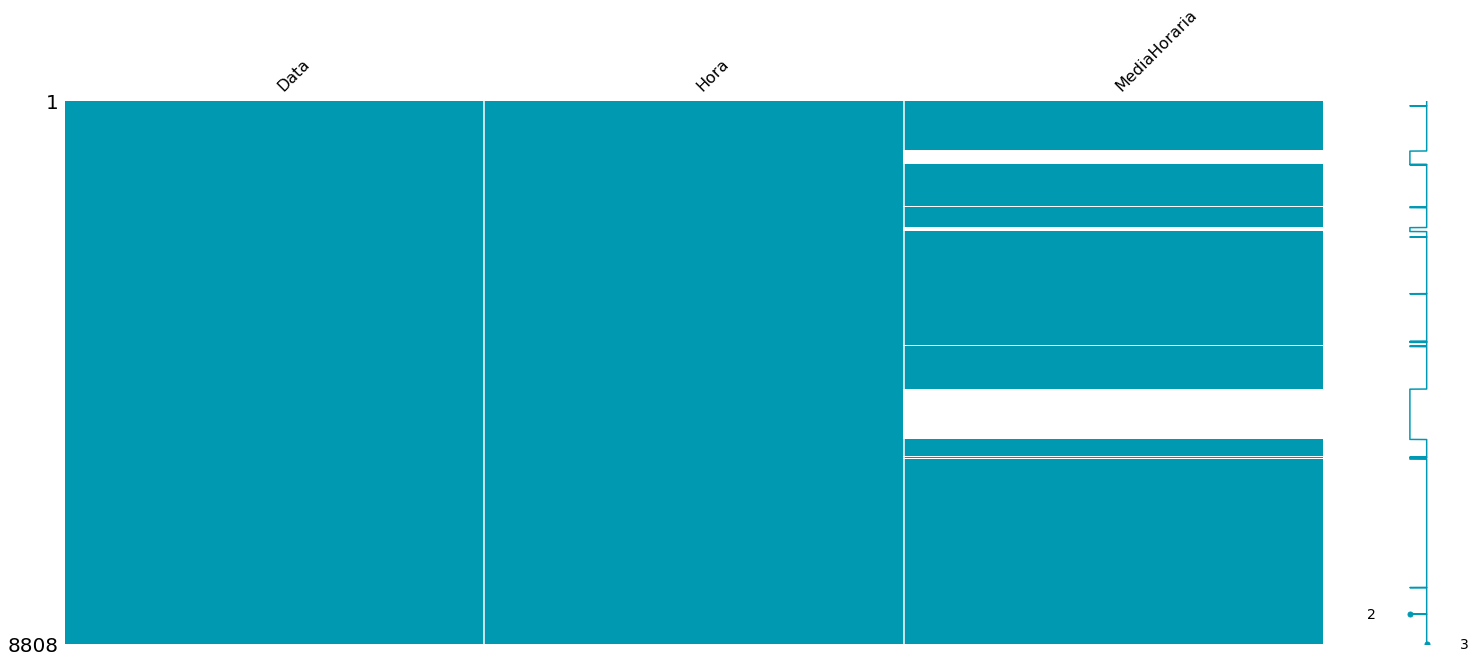

In [7]:
_ = msno.matrix(data, color=(0, 0.6, 0.7))

### Analisando a Distribuição das Médias Diárias de Ozônio

In [8]:
data.describe()["MediaHoraria"].round(2)

count    7651.00
mean       16.28
std        14.94
min         0.00
25%         7.00
50%        12.00
75%        21.00
max       132.00
Name: MediaHoraria, dtype: float64

#### Histograma

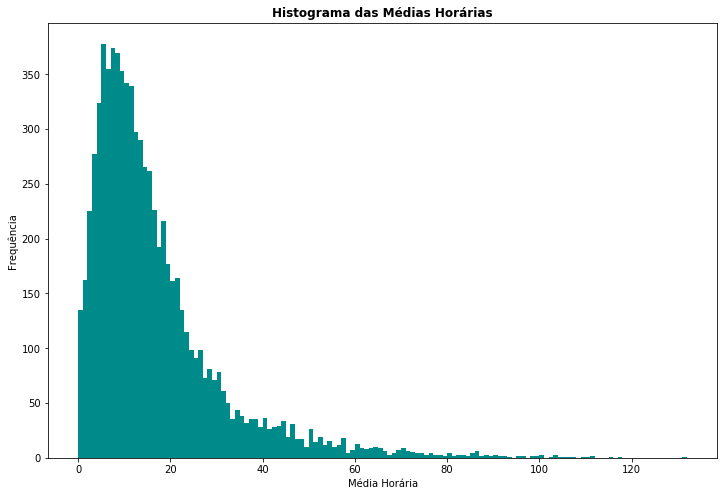

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(data['MediaHoraria'], bins=132, color="darkcyan")
plt.xlabel("Média Horária")
plt.ylabel("Frequência")
plt.title("Histograma das Médias Horárias", fontweight='bold')
plt.show()

#### Box Plot

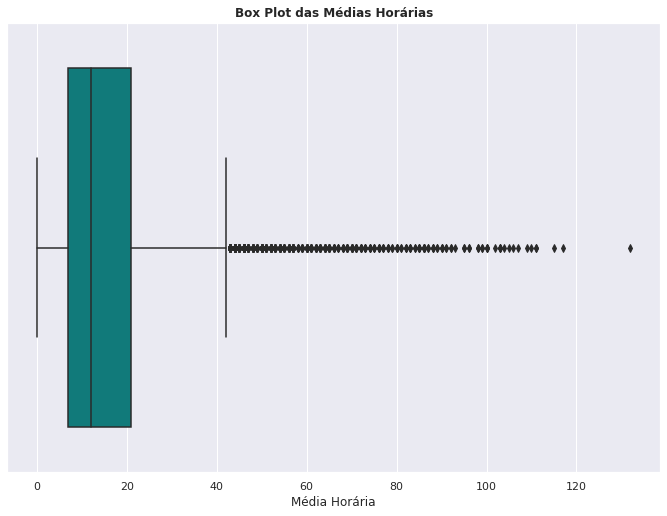

In [13]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(x='MediaHoraria', data=data, showfliers=True, color="darkcyan")
plt.xlabel("Média Horária")
plt.title("Box Plot das Médias Horárias", fontweight='bold')
plt.show()

## Média Horária em Função dos Meses

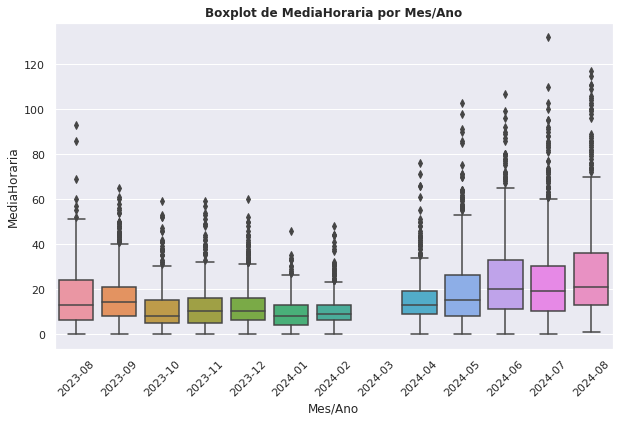

In [14]:
data['Mes/Ano'] = data['Data'].dt.to_period('M')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mes/Ano', y='MediaHoraria', data=data)
plt.title('Boxplot de MediaHoraria por Mes/Ano', fontweight='bold')
plt.xlabel('Mes/Ano')
plt.ylabel('MediaHoraria')
plt.xticks(rotation=45)
plt.show()

In [15]:
data.groupby('Mes/Ano').agg(
    ValorMedio=('MediaHoraria', 'mean'),
    DesvioPadrao=('MediaHoraria', 'std'),
    Maximo=('MediaHoraria', 'max'),
    Minimo=('MediaHoraria', 'min')
).reset_index()

,Mes/Ano,ValorMedio,DesvioPadrao,Maximo,Minimo
0,2023-08,16.665595,13.951901,93.0,0.0
1,2023-09,16.571429,12.225469,65.0,0.0
2,2023-10,10.814305,8.632370,59.0,0.0
3,2023-11,12.119266,9.588844,59.0,0.0
4,2023-12,12.129206,9.236748,60.0,0.0
5,2024-01,8.837209,6.795811,46.0,0.0
6,2024-02,10.302326,7.079412,48.0,0.0
7,2024-03,NaN,NaN,NaN,NaN
8,2024-04,15.437599,10.343605,76.0,0.0
9,2024-05,19.623656,16.175710,103.0,0.0


## Média Horária em Função da Hora

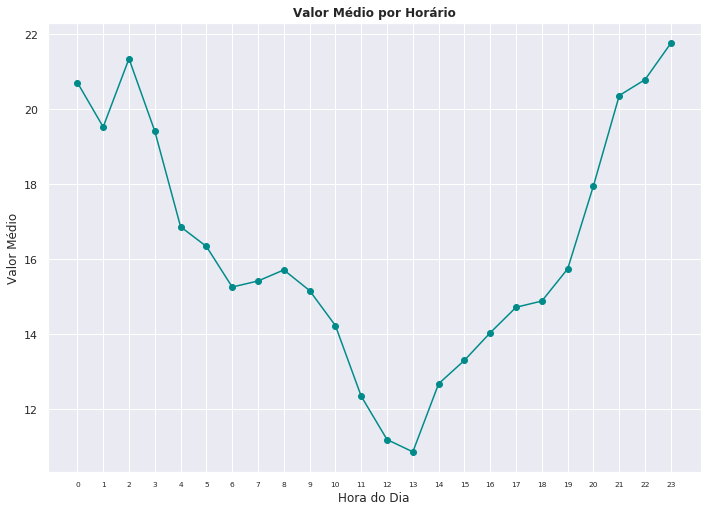

In [16]:
grouped_by_hour = data.groupby("Hora").mean()["MediaHoraria"]
new_index = [(str(i)[:2]) for i in grouped_by_hour.index]

_ = plt.plot(new_index, grouped_by_hour, linestyle='-', color='darkcyan', marker='o', markersize=6)
plt.xticks(fontsize=7.5)
plt.xlabel("Hora do Dia")
plt.ylabel("Valor Médio")
plt.title("Valor Médio por Horário", fontweight='bold')
plt.grid(True)
plt.show()

## Média Horária em Função do Período do Dia

In [17]:
def get_period(hour):
    if 0 <= hour < 6:
        return 'Madrugada'
    elif 6 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

data['Periodo'] = data['Hora'].apply(get_period)
grouped_by_period = data.groupby('Periodo')['MediaHoraria']

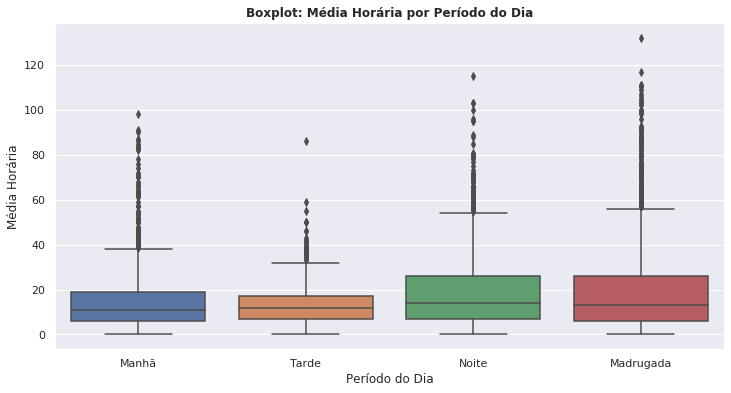

In [20]:
plt.figure(figsize=(12, 6))


# Create a boxplot
sns.boxplot(x='Periodo', y='MediaHoraria', data=data, order=['Manhã', 'Tarde', 'Noite', 'Madrugada'])

# Set title and labels
plt.title('Boxplot: Média Horária por Período do Dia', fontweight='bold')
plt.xlabel('Período do Dia')
plt.ylabel('Média Horária')

# Display the plot
plt.show()

## Correlação da Média Horária com os Atributos de Tempo

In [21]:
new_df = data.set_index('Data')
new_df['DiaDaSemana'] = new_df.index.dayofweek  # 0 = Monday, 6 = Sunday
new_df['Mês'] = new_df.index.month
new_df['Dia'] = new_df.index.day
new_df['Semana'] = new_df.index.isocalendar().week

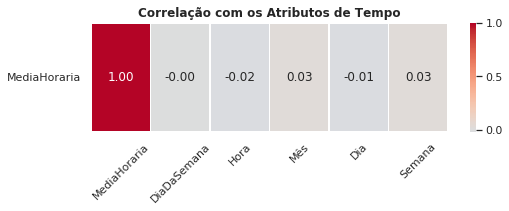

In [22]:
correlation_with_time_features = new_df[['MediaHoraria', 'DiaDaSemana', 'Hora', 'Mês', 'Dia', 'Semana']].corr()
mediahoraria_corr = correlation_with_time_features.loc["MediaHoraria"]
mediahoraria_corr = pd.DataFrame(mediahoraria_corr).T

plt.figure(figsize=(8, 2))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(mediahoraria_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)

# Set title and labels
plt.title('Correlação com os Atributos de Tempo', fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

## Correlação da Média Horária com o Lag

In [23]:
data['MediaHoraria_Lag1'] = data['MediaHoraria'].shift(1)
data['MediaHoraria_Lag2'] = data['MediaHoraria'].shift(2)
data['MediaHoraria_Lag3'] = data['MediaHoraria'].shift(3)

lagged_correlation = data[['MediaHoraria', 'MediaHoraria_Lag1', 'MediaHoraria_Lag2', 'MediaHoraria_Lag3']].corr()
lagged_correlation = lagged_correlation.loc["MediaHoraria"]
lagged_correlation = pd.DataFrame(lagged_correlation).T

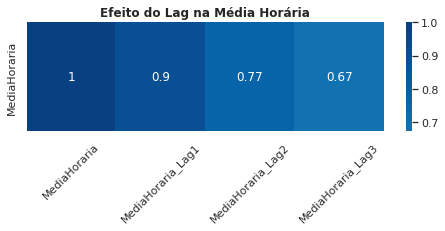

In [24]:
plt.figure(figsize=(8, 2))
sns.heatmap(lagged_correlation, annot=True, cmap='GnBu', center=0)
plt.title('Efeito do Lag na Média Horária', fontweight='bold')
plt.xticks(rotation=45)
plt.show()